In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

618

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7b752e06a24786312a462a9d64222df1


In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | east london
Processing Record 2 of Set 1 | taltal
Processing Record 3 of Set 1 | dakar
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | avarua
Processing Record 6 of Set 1 | cidreira
Processing Record 7 of Set 1 | luderitz
Processing Record 8 of Set 1 | khandwa
Processing Record 9 of Set 1 | kaitangata
Processing Record 10 of Set 1 | tiksi
Processing Record 11 of Set 1 | butaritari
Processing Record 12 of Set 1 | guia de isora
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | sao filipe
Processing Record 15 of Set 1 | mecca
Processing Record 16 of Set 1 | katsuura
Processing Record 17 of Set 1 | depalpur
Processing Record 18 of Set 1 | port blair
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | rocha
Processing Record 21 of Set 1 | saldanha
Processing Record 22 of Set 1 | portland
Processing Record 23 of Set 1 | atuona
Process

Processing Record 39 of Set 4 | quevedo
Processing Record 40 of Set 4 | jacareacanga
Processing Record 41 of Set 4 | cheremkhovo
Processing Record 42 of Set 4 | qitaihe
Processing Record 43 of Set 4 | presidencia roque saenz pena
Processing Record 44 of Set 4 | newport
Processing Record 45 of Set 4 | xichang
Processing Record 46 of Set 4 | lumeje
Processing Record 47 of Set 4 | nampula
Processing Record 48 of Set 4 | drumheller
Processing Record 49 of Set 4 | itaqui
Processing Record 50 of Set 4 | namatanai
Processing Record 1 of Set 5 | cayenne
Processing Record 2 of Set 5 | saint combs
City not found. Skipping...
Processing Record 3 of Set 5 | berlevag
Processing Record 4 of Set 5 | vila franca do campo
Processing Record 5 of Set 5 | dafeng
Processing Record 6 of Set 5 | lamu
Processing Record 7 of Set 5 | sao joao da barra
Processing Record 8 of Set 5 | cootamundra
Processing Record 9 of Set 5 | ukiah
Processing Record 10 of Set 5 | abu dhabi
Processing Record 11 of Set 5 | tomatlan

Processing Record 28 of Set 8 | suntar
Processing Record 29 of Set 8 | antalaha
Processing Record 30 of Set 8 | muros
Processing Record 31 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 32 of Set 8 | yeppoon
Processing Record 33 of Set 8 | slonim
Processing Record 34 of Set 8 | tehri
Processing Record 35 of Set 8 | atherton
Processing Record 36 of Set 8 | sioux lookout
Processing Record 37 of Set 8 | baker city
Processing Record 38 of Set 8 | anadyr
Processing Record 39 of Set 8 | west bay
Processing Record 40 of Set 8 | kalanwali
Processing Record 41 of Set 8 | wainwright
Processing Record 42 of Set 8 | alakurtti
Processing Record 43 of Set 8 | saint anthony
Processing Record 44 of Set 8 | vestmannaeyjar
Processing Record 45 of Set 8 | celestun
Processing Record 46 of Set 8 | kitgum
Processing Record 47 of Set 8 | vesoul
Processing Record 48 of Set 8 | richards bay
Processing Record 49 of Set 8 | demba
Processing Record 50 of Set 8 | homa bay
Processing Record 1 of 

Processing Record 19 of Set 12 | voh
Processing Record 20 of Set 12 | petersberg
Processing Record 21 of Set 12 | kaliua
Processing Record 22 of Set 12 | polis
Processing Record 23 of Set 12 | ponta grossa
Processing Record 24 of Set 12 | kouango
Processing Record 25 of Set 12 | lagos
Processing Record 26 of Set 12 | simi
Processing Record 27 of Set 12 | harer
Processing Record 28 of Set 12 | rungata
City not found. Skipping...
Processing Record 29 of Set 12 | dolores
Processing Record 30 of Set 12 | fujinomiya
Processing Record 31 of Set 12 | totness
Processing Record 32 of Set 12 | abha
Processing Record 33 of Set 12 | chunskiy
Processing Record 34 of Set 12 | wufeng
Processing Record 35 of Set 12 | kyzyl-suu
Processing Record 36 of Set 12 | belyy yar
Processing Record 37 of Set 12 | christchurch
Processing Record 38 of Set 12 | tulun
Processing Record 39 of Set 12 | turan
Processing Record 40 of Set 12 | svetlyy
Processing Record 41 of Set 12 | osterburg
Processing Record 42 of Set 

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,East London,-33.0153,27.9116,76.57,74,100,5.35,ZA,2022-02-02 01:09:21
1,Taltal,-25.4000,-70.4833,66.34,78,0,3.24,CL,2022-02-02 01:09:22
2,Dakar,14.6937,-17.4441,74.28,53,100,13.65,SN,2022-02-02 01:09:22
3,Punta Arenas,-53.1500,-70.9167,48.11,66,40,21.85,CL,2022-02-02 01:09:22
4,Avarua,-21.2078,-159.7750,82.45,78,20,12.66,CK,2022-02-02 01:09:23
5,Cidreira,-30.1811,-50.2056,72.45,74,0,12.39,BR,2022-02-02 01:07:57
6,Luderitz,-26.6481,15.1594,63.68,91,67,7.87,NA,2022-02-02 01:05:33
7,Khandwa,21.8333,76.3333,62.44,51,4,1.81,IN,2022-02-02 01:09:23
8,Kaitangata,-46.2817,169.8464,73.92,66,100,12.77,NZ,2022-02-02 01:09:24
9,Tiksi,71.6872,128.8694,-10.25,96,100,6.44,RU,2022-02-02 01:07:55


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,East London,ZA,2022-02-02 01:09:21,-33.0153,27.9116,76.57,74,100,5.35
1,Taltal,CL,2022-02-02 01:09:22,-25.4000,-70.4833,66.34,78,0,3.24
2,Dakar,SN,2022-02-02 01:09:22,14.6937,-17.4441,74.28,53,100,13.65
3,Punta Arenas,CL,2022-02-02 01:09:22,-53.1500,-70.9167,48.11,66,40,21.85
4,Avarua,CK,2022-02-02 01:09:23,-21.2078,-159.7750,82.45,78,20,12.66


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

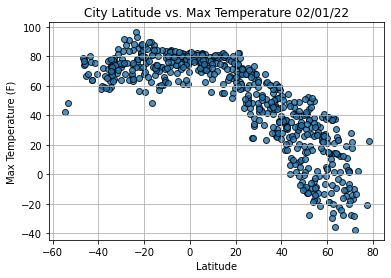

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

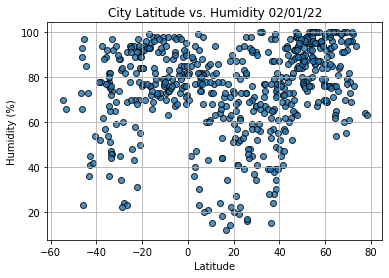

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

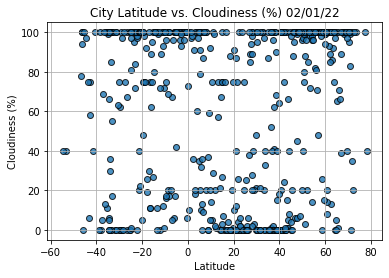

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

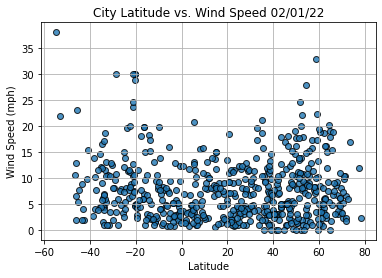

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()